In [43]:
#pip install matplotlib

In [44]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, recall_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from datetime import datetime
import matplotlib
import os
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv('result.csv')

In [46]:
data.head()

,primaryRole,secondaryRole,companyArea,profileLevel,postulationDate,candidateName,residenceCountry,lastWorkCenter,lastWorkPosition,studyCenterCountry,...,worksNumber,careerField,careerStatus,careerDegree,studiesNumber,technicalSkills,languages,anotherSkills,references,salary
0,Analista,.Net,Desarrollo De Software,No Especificado,2021-10-27,Argenis Coromoto Junior Carvajal Perez,Venezuela,Otro,Otro,Venezuela,...,3,Ingenieria Relacionada Directamente A Informatica,Graduado,Universitario,1,6,1,3,0,2000
1,Analista,.Net,Desarrollo De Software,No Especificado,2021-10-30,Percy Camala,Peru,Otro,Si,Otro,...,4,No Ingenieria Relacionada Directamente A Infor...,Graduado,Universitario,1,10,2,4,0,2500
2,Analista,Php,Desarrollo De Software,No Especificado,2021-11-03,Marco Antonio Neciosup Panibra,Peru,Otro,Si,Peru - Lima,...,4,No Ingenieria No Relacionada Directamente A In...,Graduado,Otro,2,6,1,5,0,2000
3,Analista,Php,Desarrollo De Software,No Especificado,2021-11-03,Oiver Tarrillo Vasquez,Peru,Otro,Si,Peru - Lima,...,3,No Ingenieria Relacionada Directamente A Infor...,Graduado,Tecnico,2,6,1,2,0,1800
4,Analista,Php,Desarrollo De Software,No Especificado,2021-11-01,Jorge Luis Martinez Cardenas,Peru,Otro,Otro,Peru - Lima,...,6,No Ingenieria No Relacionada Directamente A In...,Graduado,Otro,3,12,1,1,0,3500


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12214 entries, 0 to 12213
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   primaryRole         12214 non-null  object
 1   secondaryRole       12214 non-null  object
 2   companyArea         12214 non-null  object
 3   profileLevel        12214 non-null  object
 4   postulationDate     12214 non-null  object
 5   candidateName       12214 non-null  object
 6   residenceCountry    12214 non-null  object
 7   lastWorkCenter      12214 non-null  object
 8   lastWorkPosition    12214 non-null  object
 9   studyCenterCountry  12214 non-null  object
 10  studyCenterType     12214 non-null  object
 11  studyCenterSector   12214 non-null  object
 12  channel             12214 non-null  object
 13  yearsOfExperience   12214 non-null  int64 
 14  worksNumber         12214 non-null  int64 
 15  careerField         12214 non-null  object
 16  careerStatus        12

In [48]:
data.columns

Index(['primaryRole', 'secondaryRole', 'companyArea', 'profileLevel',
       'postulationDate', 'candidateName', 'residenceCountry',
       'lastWorkCenter', 'lastWorkPosition', 'studyCenterCountry',
       'studyCenterType', 'studyCenterSector', 'channel', 'yearsOfExperience',
       'worksNumber', 'careerField', 'careerStatus', 'careerDegree',
       'studiesNumber', 'technicalSkills', 'languages', 'anotherSkills',
       'references', 'salary'],
      dtype='object')

Analista         2081
Practicante      1620
Desarrollador    1477
Ejecutivo        1383
Especialista     1329
Asistente        1206
Jefe             1047
Gestor            599
Consultor         390
Arquitecto        347
Name: primaryRole, dtype: int64


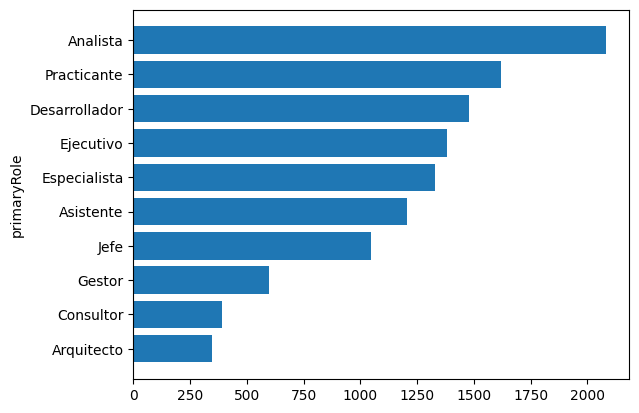

Comercial     1479
Rrhh          1309
.Net          1199
Cloud         1092
Proyectos     1047
Calidad        543
Servicios      533
Funcional      473
Desarrollo     414
Social         366
Name: secondaryRole, dtype: int64


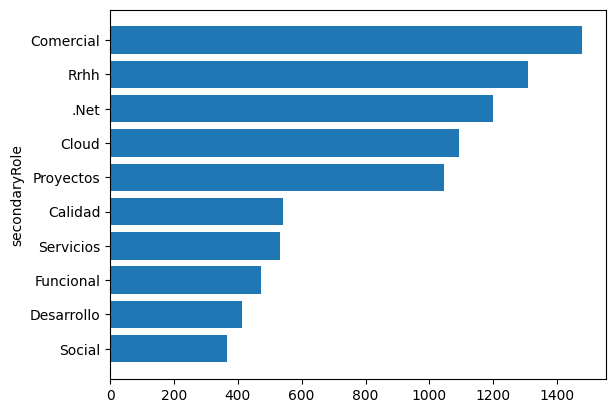

Desarrollo De Software    4580
Servicios En La Nube      1726
Comercial                 1666
Rrhh                      1309
Analitica                 1254
Operaciones                729
Modern Workplace           499
Industria 4.0              279
Pmo                        172
Name: companyArea, dtype: int64


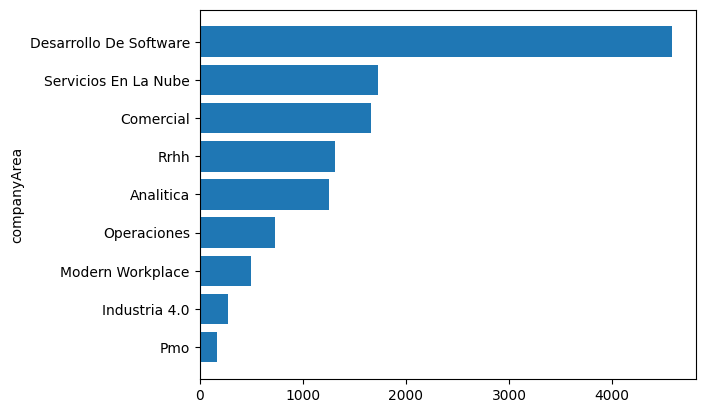

No Especificado    11202
Junior               723
Senior               266
Semi Senior           23
Name: profileLevel, dtype: int64


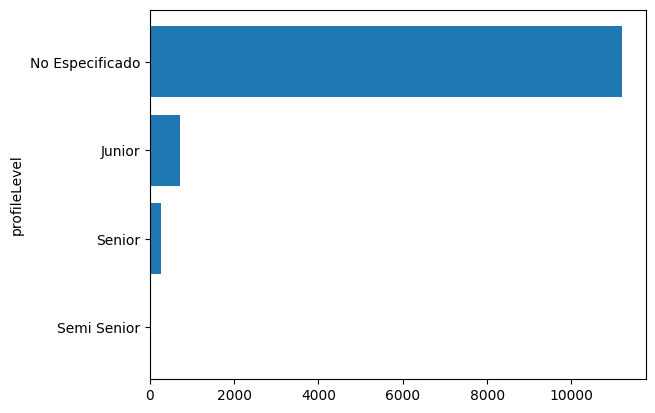

Peru                    11933
Venezuela                 143
Otro                       90
Argentina                  15
Colombia                    8
Brasil                      4
Republica Dominicana        4
Chile                       4
Ecuador                     3
Espana                      3
Name: residenceCountry, dtype: int64


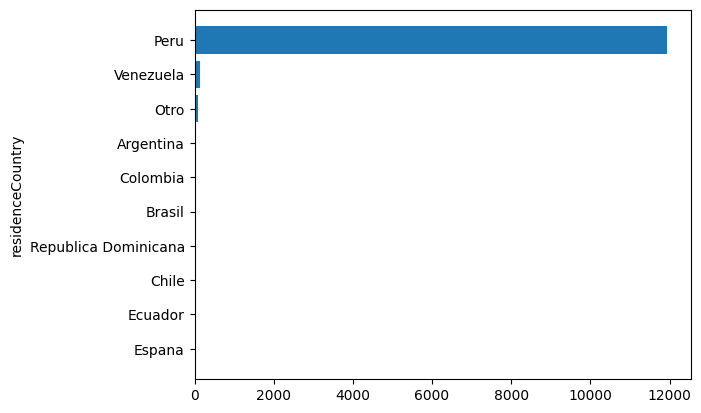

Bumeran     9776
Linkedin    2438
Name: channel, dtype: int64


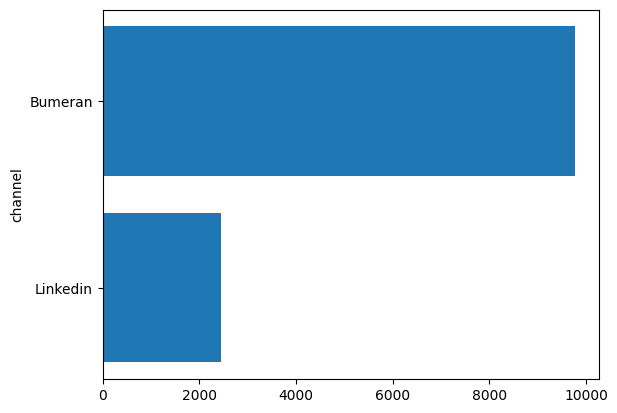

Otro    9164
Si      1540
No      1510
Name: lastWorkCenter, dtype: int64


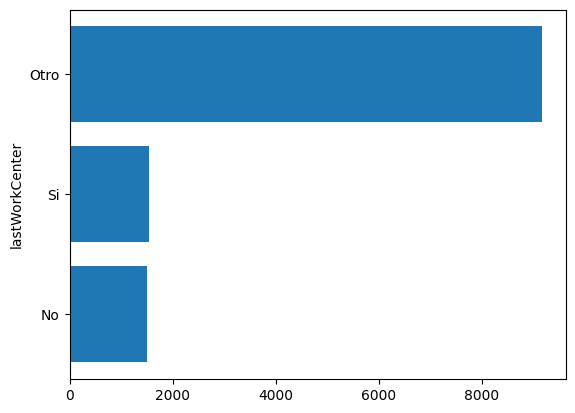

Otro    7463
Si      2938
No      1813
Name: lastWorkPosition, dtype: int64


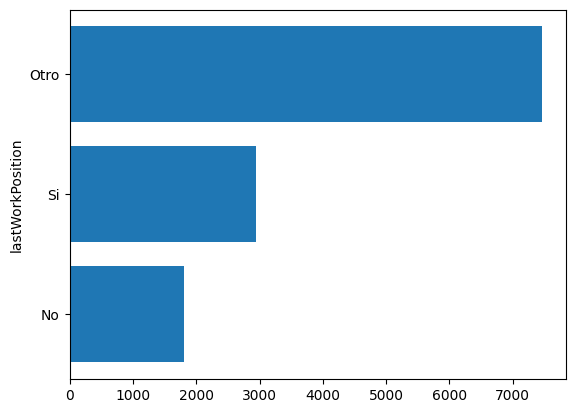

Peru - Lima       7566
Otro              3266
Peru - No Lima     793
Usa                228
Espana              97
Peru                94
Venezuela           49
Mexico              37
Argentina           36
Colombia            25
Name: studyCenterCountry, dtype: int64


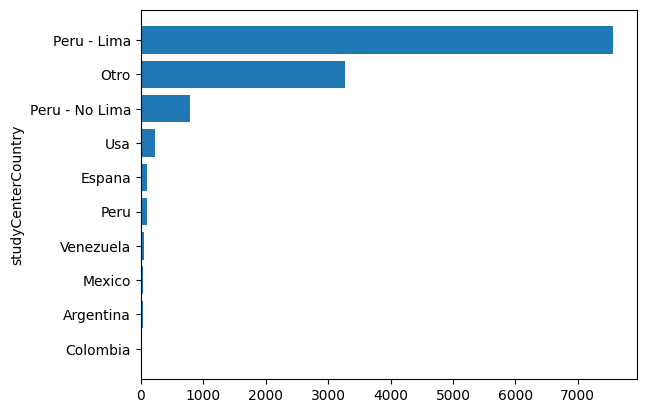

Universidad      7154
Otro             2580
Instituto        1581
Certificacion     540
Escuela           263
Centro             49
Colegio            47
Name: studyCenterType, dtype: int64


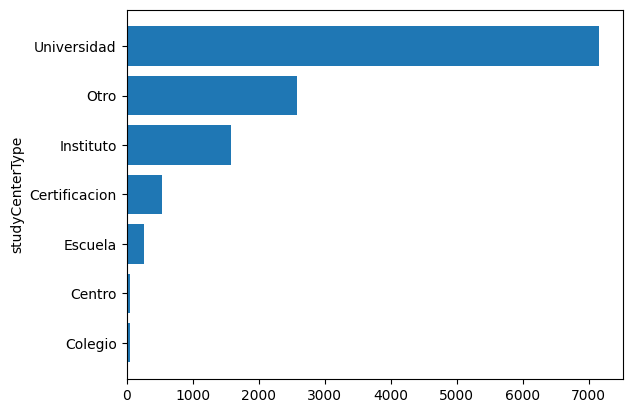

Privado    7112
Otro       3451
Publico    1651
Name: studyCenterSector, dtype: int64


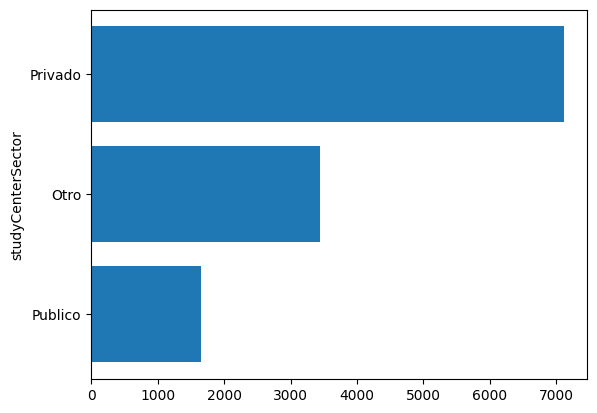

No Ingenieria No Relacionada Directamente A Informatica    3824
Ingenieria Relacionada Directamente A Informatica          3146
No Ingenieria Relacionada Directamente A Informatica       2305
Otro                                                       1910
Ingenieria No Relacionada Directamente A Informatica       1029
Name: careerField, dtype: int64


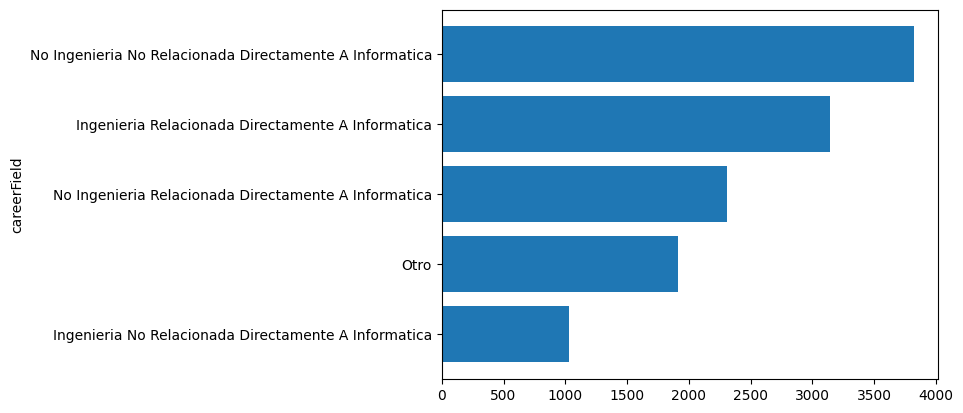

Graduado      7811
En Curso      2835
Otro          1434
Abandonado     134
Name: careerStatus, dtype: int64


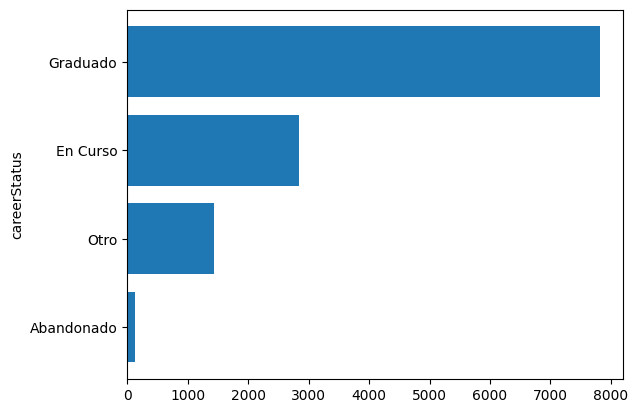

Universitario      4225
Otro               3817
Posgrado           1082
Tecnico            1020
Maestria            767
Egresado            616
Bachiller           352
Certificacion        93
Diplomado            88
Especializacion      49
Name: careerDegree, dtype: int64


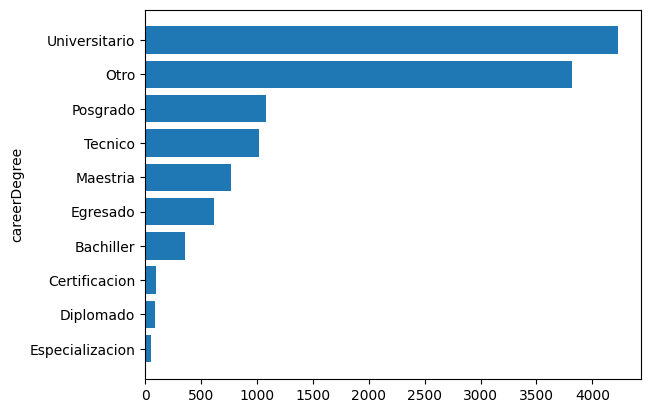

In [54]:
categoricalColumns = ["primaryRole", "secondaryRole", "companyArea", "profileLevel", "residenceCountry", "channel", "lastWorkCenter", "lastWorkPosition", "studyCenterCountry", "studyCenterType", "studyCenterSector", "careerField", "careerStatus", "careerDegree"]
for column in categoricalColumns:
    top10 = data[column].value_counts()[:10]
    print(top10)
    y_axis = list(reversed(top10.index))
    x_axis = list(reversed(top10.values))
    plt.ylabel(column)
    plt.barh(y_axis, x_axis)
    plt.show()

0     1658
1      897
2      920
3      877
4      930
5      797
6      782
7      738
8      696
9      562
10     528
11     465
12     324
13     323
14     260
15     270
16     186
17     136
18     110
19     116
20     639
Name: yearsOfExperience, dtype: int64


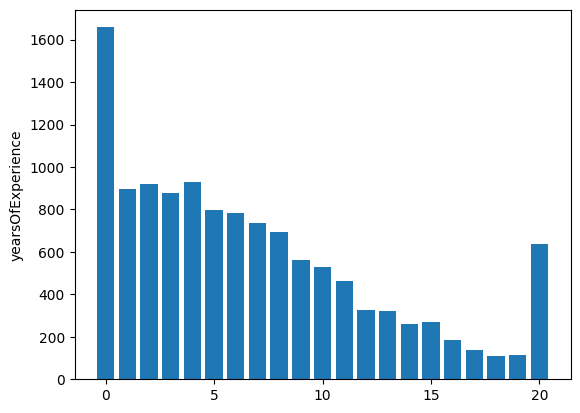

0      947
1      789
2      908
3     2090
4     1232
5     1342
6     1085
7      980
8      739
9      538
10    1564
Name: worksNumber, dtype: int64


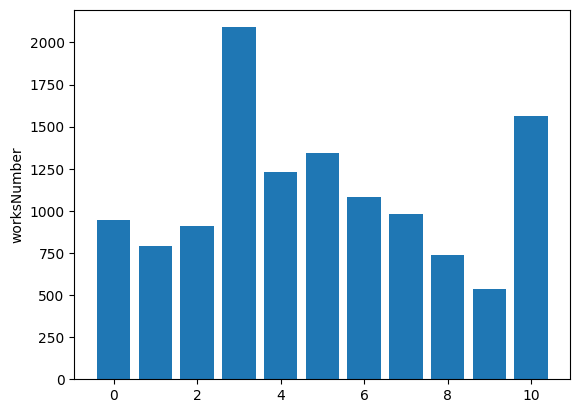

0     1314
1     3860
2     2558
3     1404
4      796
5      523
6      474
7      324
8      207
9      155
10     599
Name: studiesNumber, dtype: int64


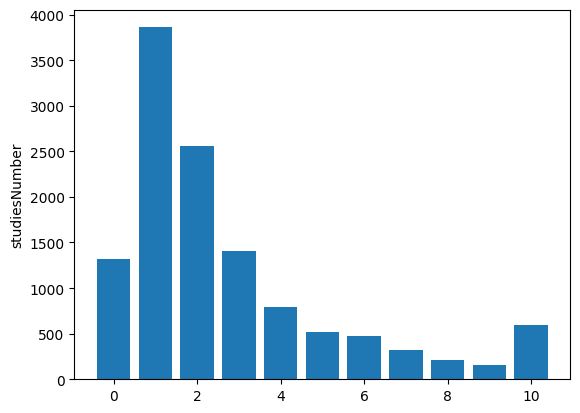

0     3600
1     1249
2      837
3      852
4      600
5      536
6      470
7      439
8      379
9      406
10     295
11     309
12     246
13     216
14     171
15     150
16     212
17     117
18     116
19      76
20      72
21      83
22      69
23      73
24      51
25     590
Name: technicalSkills, dtype: int64


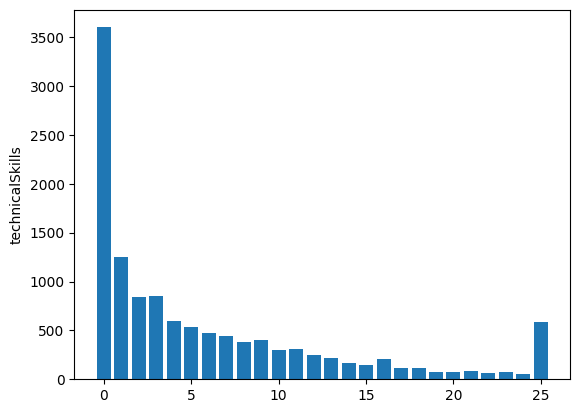

1    10449
2     1487
3      221
4       56
5        1
Name: languages, dtype: int64


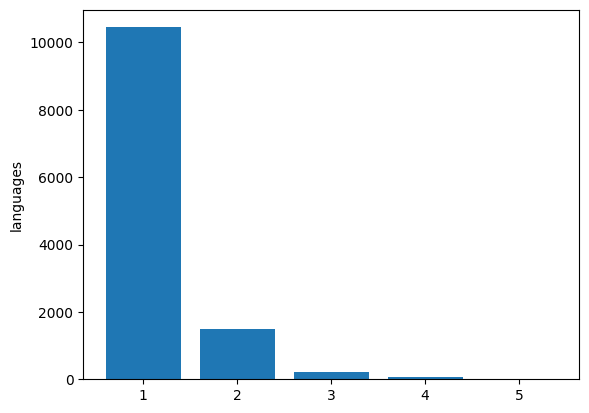

0     3413
1     1949
2     1994
3      999
4      761
5      588
6      446
7      397
8      308
9      247
10    1112
Name: anotherSkills, dtype: int64


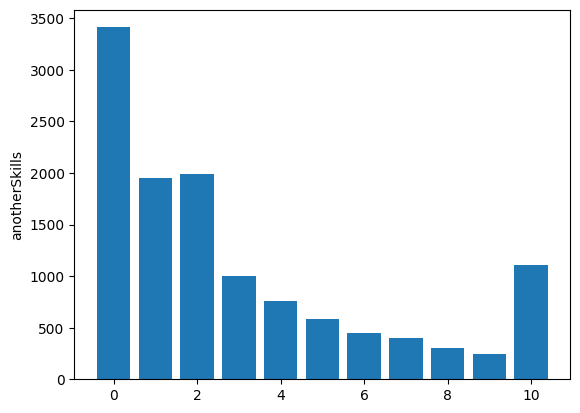

0    10371
1      623
2      347
3       85
4       82
5      706
Name: references, dtype: int64


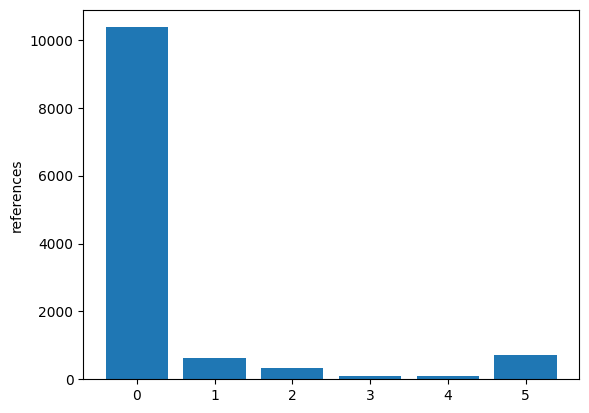

In [53]:
numericNonScaledColumns = ["yearsOfExperience", "worksNumber", "studiesNumber", "technicalSkills", "languages", "anotherSkills", "references"]
for column in numericNonScaledColumns:
    top10 = data[column].value_counts().sort_index()
    print(top10)
    y_axis = list(reversed(top10.index))
    x_axis = list(reversed(top10.values))
    plt.ylabel(column)
    plt.bar(y_axis, x_axis)
    plt.show()

850       35
930      589
950       17
960        4
970        1
        ... 
9300       1
9500      30
9600       2
9800       2
10000    278
Name: salary, Length: 123, dtype: int64


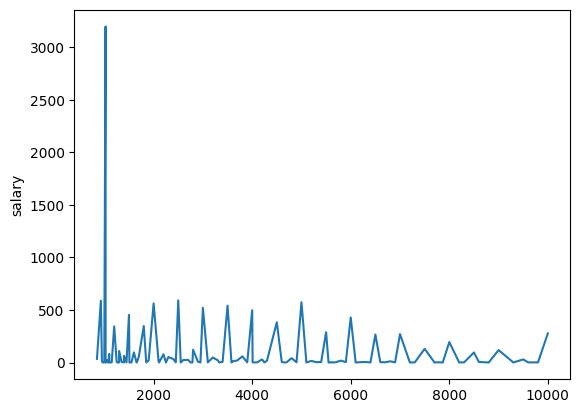

In [51]:
numericNonScaledColumns = ["salary"]
for column in numericNonScaledColumns:
    top10 = data[column].value_counts().sort_index()
    print(top10)
    y_axis = list(reversed(top10.index))
    x_axis = list(reversed(top10.values))
    plt.ylabel(column)
    plt.plot(y_axis, x_axis)
    plt.show()